In [1]:
import os
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Set the path to the BNC2014 dataset
bnc_path = "bnc2014spoken-xml"

In [2]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhij\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
dir_corpus = 'bnc2014spoken-xml/spoken/untagged/'
print(dir_corpus)
f_names = os.listdir(dir_corpus)
f_paths = [f"{dir_corpus}{f_name}" for f_name in f_names]

# f_paths = ['bnc2014spoken-xml/spoken/untagged/S2A5.xml']

f_paths

bnc2014spoken-xml/spoken/untagged/


['bnc2014spoken-xml/spoken/untagged/S23A.xml',
 'bnc2014spoken-xml/spoken/untagged/S24A.xml',
 'bnc2014spoken-xml/spoken/untagged/S24D.xml',
 'bnc2014spoken-xml/spoken/untagged/S24E.xml',
 'bnc2014spoken-xml/spoken/untagged/S263.xml',
 'bnc2014spoken-xml/spoken/untagged/S26N.xml',
 'bnc2014spoken-xml/spoken/untagged/S27D.xml',
 'bnc2014spoken-xml/spoken/untagged/S28F.xml',
 'bnc2014spoken-xml/spoken/untagged/S29Q.xml',
 'bnc2014spoken-xml/spoken/untagged/S29X.xml',
 'bnc2014spoken-xml/spoken/untagged/S2A5.xml',
 'bnc2014spoken-xml/spoken/untagged/S2AJ.xml',
 'bnc2014spoken-xml/spoken/untagged/S2AX.xml',
 'bnc2014spoken-xml/spoken/untagged/S2B5.xml',
 'bnc2014spoken-xml/spoken/untagged/S2C9.xml',
 'bnc2014spoken-xml/spoken/untagged/S2CY.xml',
 'bnc2014spoken-xml/spoken/untagged/S2DD.xml',
 'bnc2014spoken-xml/spoken/untagged/S2E2.xml',
 'bnc2014spoken-xml/spoken/untagged/S2EF.xml',
 'bnc2014spoken-xml/spoken/untagged/S2FQ.xml',
 'bnc2014spoken-xml/spoken/untagged/S2FT.xml',
 'bnc2014spok

In [4]:
dialogue_data = []
for path in f_paths: # for each of the dialogues
    print(path)
    df_utts = pd.read_xml(path, xpath="//u")
    df_speakers = pd.read_xml(path, xpath="//speaker")
    dialogue_data.append((df_utts, df_speakers))
    # break

bnc2014spoken-xml/spoken/untagged/S23A.xml
bnc2014spoken-xml/spoken/untagged/S24A.xml
bnc2014spoken-xml/spoken/untagged/S24D.xml
bnc2014spoken-xml/spoken/untagged/S24E.xml
bnc2014spoken-xml/spoken/untagged/S263.xml
bnc2014spoken-xml/spoken/untagged/S26N.xml
bnc2014spoken-xml/spoken/untagged/S27D.xml
bnc2014spoken-xml/spoken/untagged/S28F.xml
bnc2014spoken-xml/spoken/untagged/S29Q.xml
bnc2014spoken-xml/spoken/untagged/S29X.xml
bnc2014spoken-xml/spoken/untagged/S2A5.xml
bnc2014spoken-xml/spoken/untagged/S2AJ.xml
bnc2014spoken-xml/spoken/untagged/S2AX.xml
bnc2014spoken-xml/spoken/untagged/S2B5.xml
bnc2014spoken-xml/spoken/untagged/S2C9.xml
bnc2014spoken-xml/spoken/untagged/S2CY.xml
bnc2014spoken-xml/spoken/untagged/S2DD.xml
bnc2014spoken-xml/spoken/untagged/S2E2.xml
bnc2014spoken-xml/spoken/untagged/S2EF.xml
bnc2014spoken-xml/spoken/untagged/S2FQ.xml
bnc2014spoken-xml/spoken/untagged/S2FT.xml
bnc2014spoken-xml/spoken/untagged/S2GC.xml
bnc2014spoken-xml/spoken/untagged/S2GS.xml
bnc2014spok

In [5]:
# Concatenate all speakers dataframes into one
df_all_speakers = pd.concat([speaker_data[1] for speaker_data in dialogue_data])
df_all_speakers

,id,exactage,age1994,agerange,gender,nat,birthplace,birthcountry,l1,lingorig,...,dialect_l2,dialect_l3,dialect_l4,edqual,occupation,socgrade,nssec,l2,fls,in_core
0,S0021,27,25_34,19_29,F,British,Swindon,England,English,England,...,england,south,southwest,5_postgrad,Teacher,B,2,None,None,y
1,S0032,28,25_34,19_29,M,British,Yoevil,England,English,England,...,england,south,southwest,4_graduate,Software developer,A,1_2,None,None,y
2,S0094,33,25_34,30_39,F,British,Swindon,England,English,England,...,england,south,southwest,5_postgrad,PhD student,A,1_2,German,Welsh -- Beginner,y
3,S0095,33,25_34,30_39,M,British,Camarthen,Scotland,English,England,...,wales,wales,wales,5_postgrad,Self employed maker,E,uncat,None,None,y
0,S0261,41,35_44,40_49,M,British/New Zealand,Wellington,New Zealand,English,England/NZ,...,non_uk,non_uk,non_uk,4_graduate,Entrepreneur,A,1_2,NaN,None,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,S0510,47,45_59,40_49,F,British,England,England,English,England,...,england,south,unspecified,5_postgrad,Receptionist,D,6,NaN,NaN,y
0,S0058,23,15_24,19_29,F,British,"Sunderland, Tyne and Wear",England,English,England,...,england,north,northeast,4_graduate,Corpus Administrator,B,2,NaN,None,n
1,S0120,23,15_24,19_29,M,British & German,"Pembury, Kent",England,English,England,...,england,south,unspecified,5_postgrad,Graduate Civil Engineer,C1,4,NaN,German -- Advanced; French -- Advanced,n
0,S0428,27,25_34,19_29,F,British,"Aylesbury, Buckinghamshire",England,English,England,...,england,south,eastern_engl,5_postgrad,Language Research Co-ordinator,A,1_2,NaN,Spanish -- level unspecified; Italian -- level...,y


In [6]:
# Concatenate all utterances dataframes into one
df_all_utts = pd.concat([utt_data[0] for utt_data in dialogue_data])
df_all_utts

,n,who,u,unclear,trans,whoConfidence,vocal,foreign,anon,pause,trunc,shift,event
0,1,S0094,words,None,None,None,NaN,None,NaN,NaN,None,NaN,NaN
1,2,S0095,it's a games word? like a computer games word?,None,None,None,NaN,None,NaN,NaN,None,NaN,NaN
2,3,S0032,yeah yeah,None,None,None,NaN,None,NaN,NaN,None,NaN,NaN
3,4,S0095,oh,oh that's nice,None,None,NaN,None,NaN,NaN,None,NaN,NaN
4,5,S0032,I it's something I,have really heard,overlap,None,NaN,None,NaN,NaN,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,316,S0432,but,Mai Li,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN
316,317,S0428,None,Sha Li,None,None,NaN,NaN,NaN,NaN,None,NaN,NaN
317,318,S0432,I'll just stick with it yeah,None,overlap,None,NaN,NaN,NaN,NaN,let,NaN,NaN
318,319,S0428,None,None,overlap,None,NaN,NaN,NaN,NaN,None,NaN,NaN


In [7]:
def get_speaker_age(speakerid):
    # get the age of the speaker with the given speakerid
    age = df_all_speakers[df_all_speakers['id'] == speakerid]['agerange'].values
    if len(age) == 0:
        return None
    else:
        return age[0]

get_speaker_age('S0432')

'19_29'

In [8]:
def preprocess_utterance(utterance):
    if utterance is None:
        return ''
    # Remove punctuation and numbers from the conversation transcript
    utterance = re.sub(r'[^\w\s]', '', utterance)  # Remove punctuation
    utterance = re.sub(r'\d+', '', utterance)  # Remove numbers
    utterance = utterance.strip()  # Remove leading/trailing whitespaces
    return utterance

preprocess_utterance("yeah I know but that's why we're an hour late isn't it?")

'yeah I know but thats why were an hour late isnt it'

In [9]:
from nltk.tokenize import word_tokenize

def extract_linguistic_features(preprocessed_conversation):
    # Extract linguistic features from the preprocessed conversation
    if preprocessed_conversation is None:
        return ""

    # Vocabulary Features
    tokens = word_tokenize(preprocessed_conversation)

    word_freq = nltk.FreqDist(tokens)
    lexical_diversity = len(word_freq) / len(tokens) if len(tokens) > 0 else 0
    # specific_word_usage = word_freq['specific_word'] if 'specific_word' in word_freq else 0
    
    # Syntactic Features
    sentences = nltk.sent_tokenize(preprocessed_conversation)
    sentence_length = sum(len(word_tokenize(sentence)) for sentence in sentences) / len(sentences) if len(sentences) > 0 else 0
    
    # Discourse Features
    discourse_markers = ['like', 'you know', 'basically']
    discourse_marker_count = sum(preprocessed_conversation.lower().count(marker) for marker in discourse_markers)
    fillers = ['uh', 'um', 'hmm', 'huh', 'er', 'ah', 'eh', 'mm']
    filler_count = sum(preprocessed_conversation.lower().count(filler) for filler in fillers)
    hesitation_count = discourse_marker_count + filler_count
    
    # Speech Rate
    words = word_tokenize(preprocessed_conversation)
    speech_rate = len(words) / len(sentences) if len(sentences) > 0 else 0
    
    # Return the extracted linguistic features as a dictionary
    linguistic_features = {
        'lexical_diversity': lexical_diversity, # each word is unique
        # 'specific_word_usage': specific_word_usage, # use of specific words
        'sentence_length': sentence_length,
        'discourse_marker_count': discourse_marker_count,
        'filler_count': filler_count,
        'hesitation_count': hesitation_count,
        'speech_rate': speech_rate
    }

    # Convert the dictionary to a string representation
    features_string = " ".join([f"{key}:{value}" for key, value in linguistic_features.items()])
    
    return features_string, linguistic_features

extract_linguistic_features(preprocess_utterance("yeah I know but that's why we're an hour late isn't it?"))[0]

'lexical_diversity:1.0 sentence_length:12.0 discourse_marker_count:0 filler_count:2 hesitation_count:2 speech_rate:12.0'

In [10]:
# loop through each df_all_speakers and get the age of each speaker
# Initialize lists to store speaker information and extracted features

speaker_ids = []
age_labels = []
utterances = []
linguistic_features = []

for i in df_all_utts.index:
    speaker_id = df_all_utts["who"].iloc[i]
    age = get_speaker_age(speaker_id)

    utterance = df_all_utts["u"].iloc[i]
    preprocessed_utterance = preprocess_utterance(utterance)    
    # Step 3: Feature Extraction
    linguistic_feature = extract_linguistic_features(preprocessed_utterance)[0]

    speaker_ids.append(speaker_id)
    age_labels.append(age)
    utterances.append(preprocessed_utterance)
    linguistic_features.append(linguistic_feature)

# Create a DataFrame to store the speaker-level data
df = pd.DataFrame({"SpeakerID": speaker_ids, "AgeLabel": age_labels, "Utterance": utterances, "Features": linguistic_features})

In [11]:
df

,SpeakerID,AgeLabel,Utterance,Features
0,S0094,30_39,words,lexical_diversity:1.0 sentence_length:1.0 disc...
1,S0095,30_39,its a games word like a computer games word,lexical_diversity:0.6666666666666666 sentence_...
2,S0032,19_29,yeah yeah,lexical_diversity:0.5 sentence_length:2.0 disc...
3,S0095,30_39,oh,lexical_diversity:1.0 sentence_length:1.0 disc...
4,S0032,19_29,I its something I,lexical_diversity:0.75 sentence_length:4.0 dis...
...,...,...,...,...
1248105,S0021,19_29,I have like,lexical_diversity:1.0 sentence_length:3.0 disc...
1248106,S0094,30_39,,lexical_diversity:0 sentence_length:0 discours...
1248107,S0032,19_29,,lexical_diversity:0 sentence_length:0 discours...
1248108,S0021,19_29,I have like tomato ketchup emergencies if I ru...,lexical_diversity:0.7391304347826086 sentence_...


# Visualization

In [12]:
df_vis = df.copy()

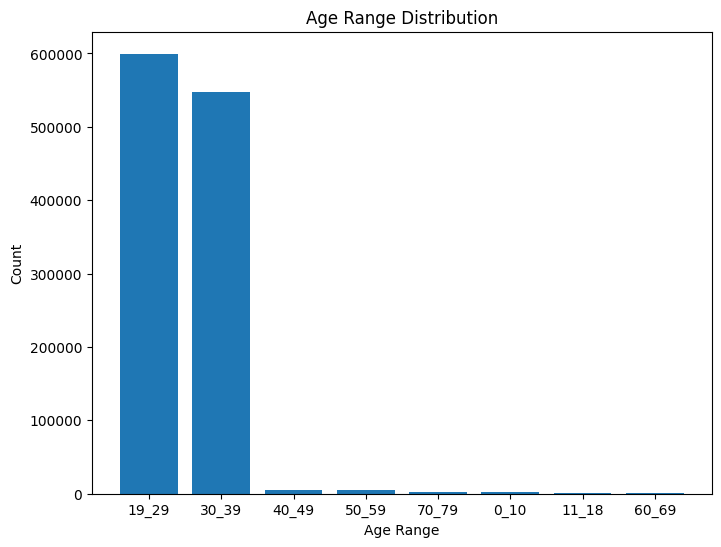

In [13]:
import matplotlib.pyplot as plt

# Count the occurrences of each age range category
age_counts = df_vis['AgeLabel'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.title('Age Range Distribution')
plt.show()


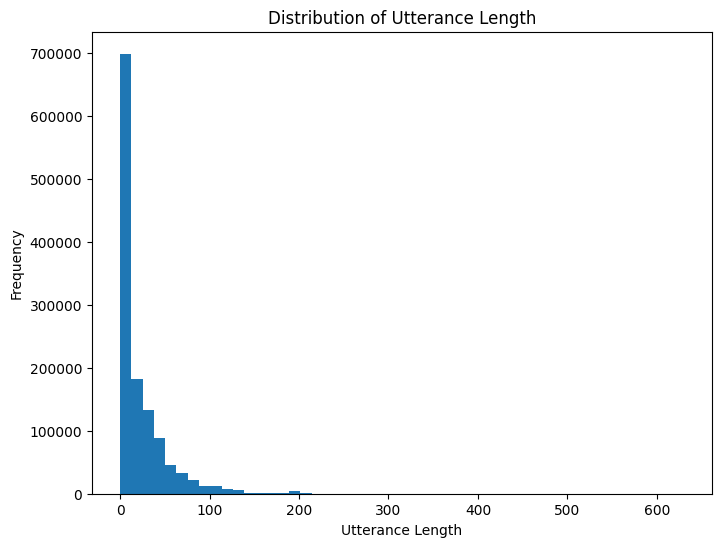

In [14]:
import matplotlib.pyplot as plt

# Compute the length of each utterance
df_vis['utterance_length'] = df_vis['Utterance'].apply(len)

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(df_vis['utterance_length'], bins=50)
plt.xlabel('Utterance Length')
plt.ylabel('Frequency')
plt.title('Distribution of Utterance Length')
plt.show()


In [15]:
def compute_lexical_diversity(text):
    # Tokenize the text into individual words
    tokens = nltk.word_tokenize(text)

    # Calculate the number of unique words (vocabulary)
    vocabulary_size = len(set(tokens))

    # Calculate the lexical diversity as the ratio of unique words to total words
    lexical_diversity = vocabulary_size / len(tokens) if len(tokens) > 0 else 0

    return lexical_diversity


# Compute the lexical diversity for each utterance
df_vis['lexical_diversity'] = df_vis['Utterance'].apply(compute_lexical_diversity)


In [16]:
def compute_word_frequency(text):
    # Tokenize the text into individual words
    tokens = nltk.word_tokenize(text)

    # Compute the word frequency distribution
    word_freq = nltk.FreqDist(tokens)

    return word_freq


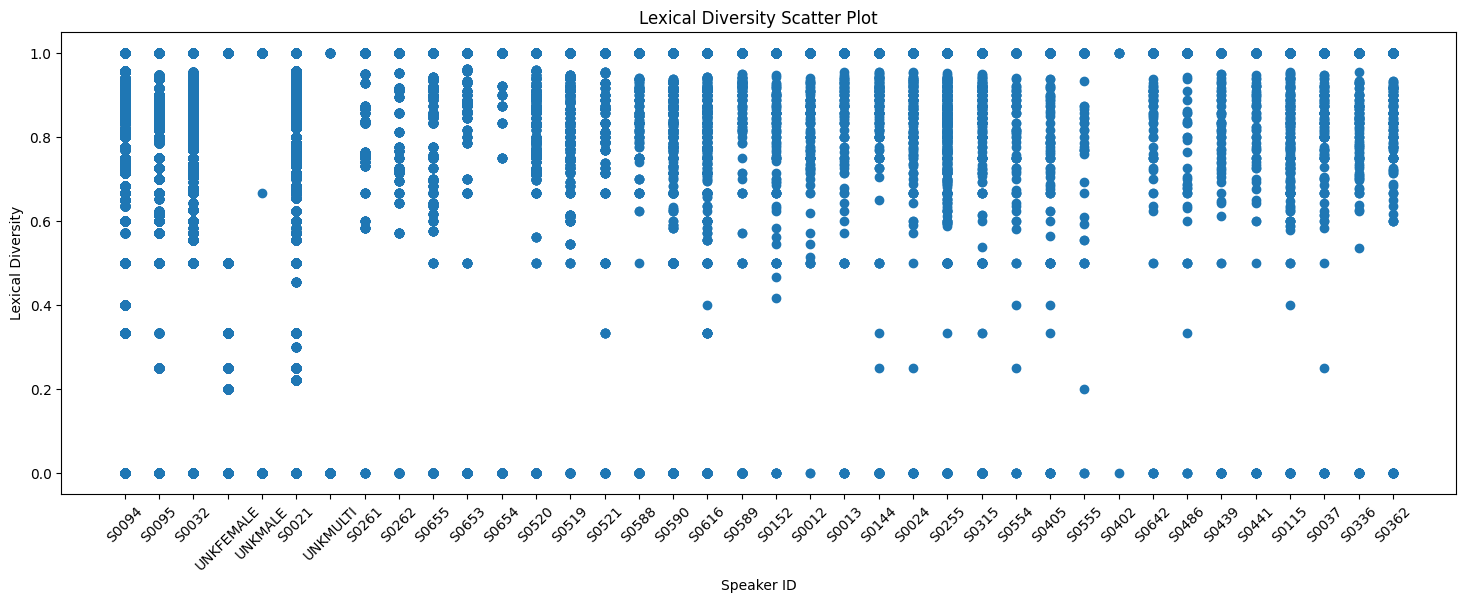

In [17]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(18, 6))
plt.scatter(df_vis['SpeakerID'], df_vis['lexical_diversity'])
plt.xlabel('Speaker ID')
plt.ylabel('Lexical Diversity')
plt.title('Lexical Diversity Scatter Plot')
plt.xticks(rotation=45)
plt.show()

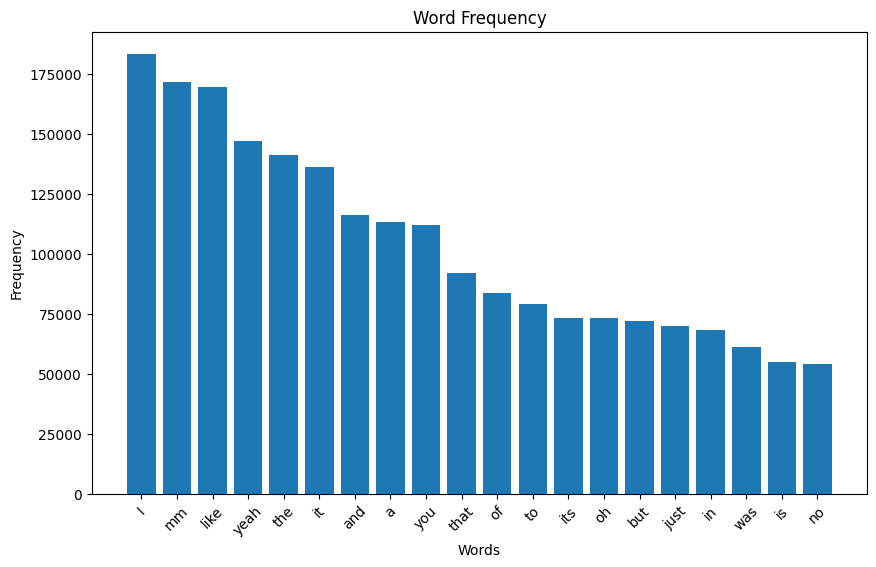

In [18]:
import matplotlib.pyplot as plt
from nltk import FreqDist

# Calculate word frequency
word_freq = compute_word_frequency(df_vis['Utterance'].str.cat(sep=' '))

# Get the most common words and their frequencies
most_common = word_freq.most_common(20)
words = [word[0] for word in most_common]
frequencies = [freq[1] for freq in most_common]

# Plot the word frequency
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency')
plt.xticks(rotation=45)
plt.show()


In [19]:
for index, row in df_vis.iterrows():
    utterance = row['Utterance']
    features = extract_linguistic_features(utterance)[1] 
    for feature, value in features.items():
        df_vis.loc[index, feature] = value

In [20]:
list(extract_linguistic_features(utterance)[1].keys())

['lexical_diversity',
 'sentence_length',
 'discourse_marker_count',
 'filler_count',
 'hesitation_count',
 'speech_rate']

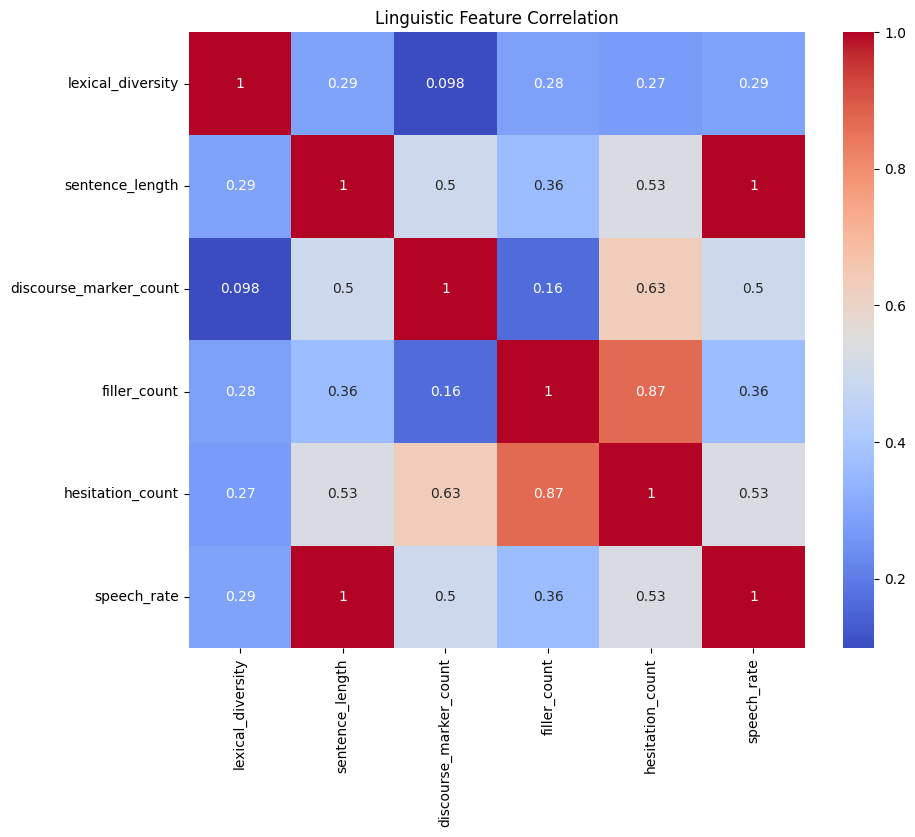

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns containing the linguistic features
linguistic_feature_columns = list(extract_linguistic_features(utterance)[1].keys())

# Calculate the correlation matrix
correlation_matrix = df_vis[linguistic_feature_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Linguistic Feature Correlation')
plt.show()


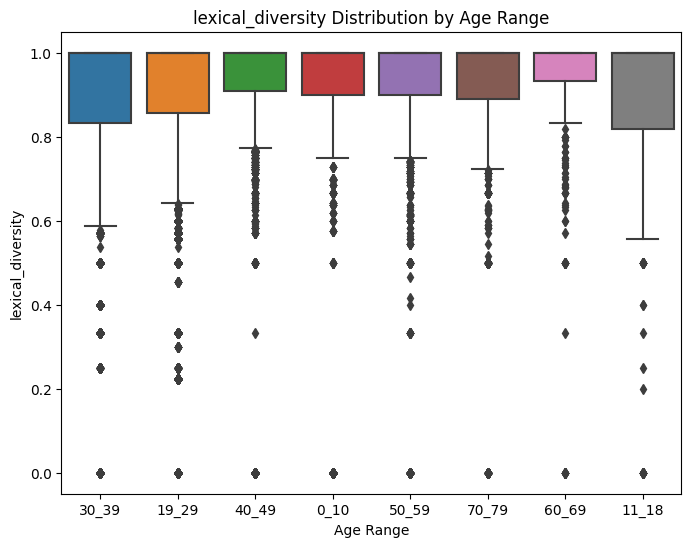

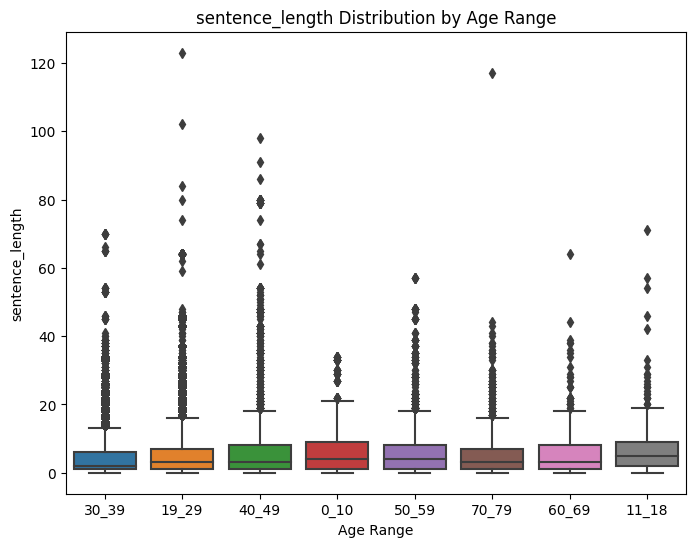

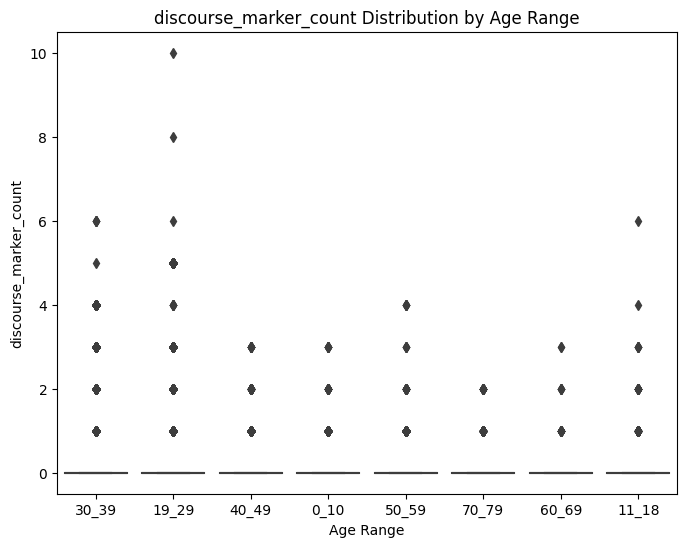

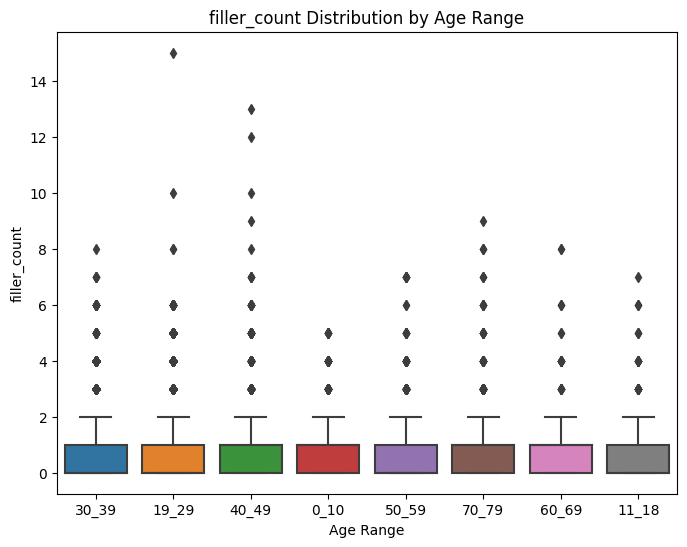

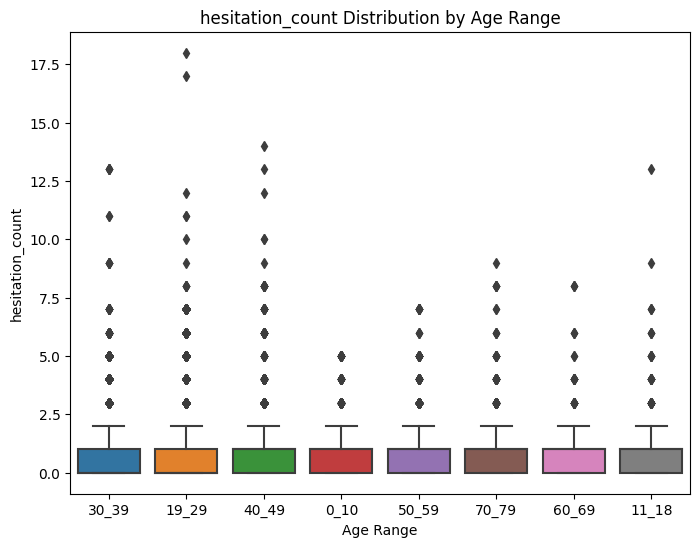

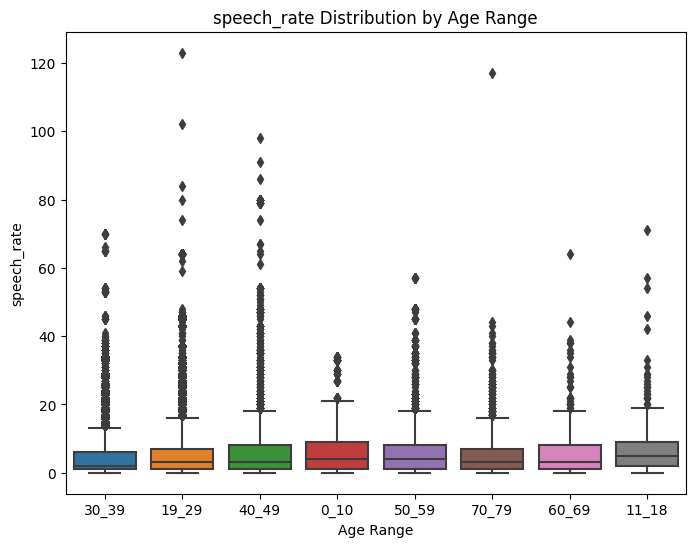

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt


features = list(extract_linguistic_features(utterance)[1].keys())

for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='AgeLabel', y=feature, data=df_vis)
    plt.title(f'{feature} Distribution by Age Range')
    plt.xlabel('Age Range')
    plt.ylabel(feature)
    plt.show()


In [1]:
list(extract_linguistic_features(utterance)[1].keys())

NameError: name 'extract_linguistic_features' is not defined

c:\Users\abhij\.conda\envs\dmassessment\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


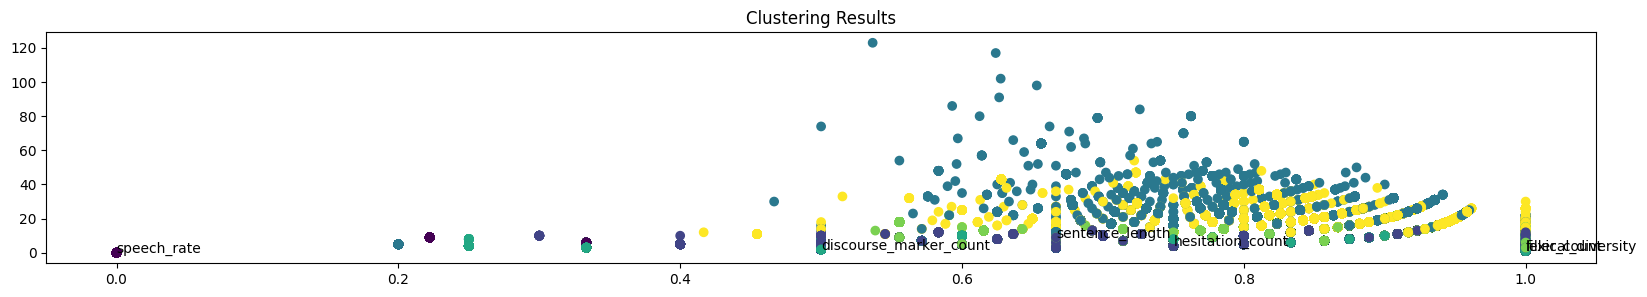

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant features for clustering
selected_features = list(extract_linguistic_features(utterance)[1].keys())

# Extract the selected features from the dataset
X = df_vis[selected_features].values

# Scale or normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
num_clusters = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the dataframe
df_vis['Cluster'] = clusters

plt.figure(figsize=(20, 3))

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=clusters)
for i, txt in enumerate(selected_features):
    plt.annotate(txt, (X[i, 0], X[i, 1]), fontsize=10)
plt.title('Clustering Results')
plt.show()

- get the time variables from untagged and create a time-series analysis on dialogue data
- get a large pretrained model

In [25]:
# get a copy of the dataframe
df_copy = df.copy()

# Replace age label values
df_copy['AgeLabel'].replace({'19_29': 'young', '50_59': 'old', '60_69': 'old', '70_79': 'old', '80_89': 'old', '90_99': 'old'}, inplace=True)
# Drop rows with remaining age labels
df_copy = df_copy[df_copy['AgeLabel'].isin(['young', 'old'])]

# remove all the None values from Utterance column
df_copy = df_copy.dropna(subset=['Utterance'])

df_copy

,SpeakerID,AgeLabel,Utterance,Features
2,S0032,young,yeah yeah,lexical_diversity:0.5 sentence_length:2.0 disc...
4,S0032,young,I its something I,lexical_diversity:0.75 sentence_length:4.0 dis...
6,S0032,young,,lexical_diversity:0 sentence_length:0 discours...
10,S0032,young,,lexical_diversity:0 sentence_length:0 discours...
12,S0021,young,,lexical_diversity:0 sentence_length:0 discours...
...,...,...,...,...
1248104,S0032,young,no its not,lexical_diversity:1.0 sentence_length:3.0 disc...
1248105,S0021,young,I have like,lexical_diversity:1.0 sentence_length:3.0 disc...
1248107,S0032,young,,lexical_diversity:0 sentence_length:0 discours...
1248108,S0021,young,I have like tomato ketchup emergencies if I ru...,lexical_diversity:0.7391304347826086 sentence_...


In [26]:
df_copy['AgeLabel'].unique()

array(['young', 'old'], dtype=object)

In [27]:
# Define the input features (X) and target variable (y)
X = df_copy[['Utterance', 'Features']]
y = df_copy['AgeLabel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train.shape

(485894, 2)

In [29]:
X_test.shape

(121474, 2)

In [30]:
print(y_train.value_counts())

AgeLabel
young    479699
old        6195
Name: count, dtype: int64


In [31]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize the vectorizer (choose either CountVectorizer or TfidfVectorizer)
vectorizer = CountVectorizer()  # or TfidfVectorizer()

# Fit the vectorizer on the training data
X_train_text = X_train['Utterance']  # assuming 'Utterance' column contains the text data
X_train_vectorized = vectorizer.fit_transform(X_train_text)

# Transform the testing data using the fitted vectorizer
X_test_text = X_test['Utterance']  # assuming 'Utterance' column contains the text data
X_test_vectorized = vectorizer.transform(X_test_text)

In [32]:
# Step 6: Model Training
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

c:\Users\abhij\.conda\envs\dmassessment\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="old")
recall = recall_score(y_test, y_pred, pos_label="old")
f1 = f1_score(y_test, y_pred, pos_label="old")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9902448260533118
Precision: 0.9304932735426009
Recall: 0.26449968132568513
F1 Score: 0.4119106699751861


In [34]:
# Step 7: Model Evaluation
y_pred = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label="young")
recall = recall_score(y_test, y_pred, pos_label="young")
f1 = f1_score(y_test, y_pred, pos_label="young")

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9902448260533118
Precision: 0.9904650163598506
Recall: 0.9997414619907427
F1 Score: 0.9950816202014667


In [35]:
# predictions for the first 5 test samples

X_test_transformed = vectorizer.inverse_transform(X_test_vectorized)

predictions = model.predict(X_test_vectorized)

# for i in range(len(X_test_transformed)):
for i in range(5):
    sentence = " ".join(X_test_transformed[i])
    predicted_output = predictions[i]
    real_output = y_test.iloc[i]
    
    print("Input Sentence: ", sentence)
    print("Predicted Output: ", predicted_output)
    print("Real Output: ", real_output)
    print()

Input Sentence:  able be drink no that to together wed
Predicted Output:  young
Real Output:  young

Input Sentence:  coming yeah
Predicted Output:  young
Real Output:  young

Input Sentence:  all didnt drank it think though we
Predicted Output:  young
Real Output:  young

Input Sentence:  
Predicted Output:  young
Real Output:  young

Input Sentence:  all good thank yeah you
Predicted Output:  young
Real Output:  young



In [36]:
# get the predictions for the whole test set and display the results in a dataframe
X_test_transformed = vectorizer.inverse_transform(X_test_vectorized)
predictions = model.predict(X_test_vectorized)

results_df = pd.DataFrame({'Input Sentence': [' '.join(sentence) for sentence in X_test_transformed],
                          'Predicted Output': predictions,
                          'Real Output': y_test.values})

results_df

,Input Sentence,Predicted Output,Real Output
0,able be drink no that to together wed,young,young
1,coming yeah,young,young
2,all didnt drank it think though we,young,young
3,,young,young
4,all good thank yeah you,young,young
...,...,...,...
121469,mm,young,young
121470,mm,young,young
121471,erm,young,young
121472,christmas for,young,young


In [37]:
wrong_predictions = results_df[results_df['Predicted Output'] != results_df['Real Output']]
wrong_predictions

,Input Sentence,Predicted Output,Real Output
134,right,young,old
303,all and cooking corner everyday for have oil o...,young,old
412,and snow,young,old
458,okay,young,old
510,about all her it remember to took well when you,young,old
...,...,...,...
120801,and could then we,young,old
120853,,young,old
120930,know mean oh one yeah you,young,old
121098,am but cant cigarette did for go gonna my out ...,young,old


0.97551739466882